In [1]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-06-15 17:22:09--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  10.5MB/s    in 0.3s    

2024-06-15 17:22:10 (10.5 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

np.random.seed()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
df_ = pd.read_csv("AirlineTweets.csv")

In [4]:
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df = df_[["airline_sentiment", "text"]].copy()

In [7]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

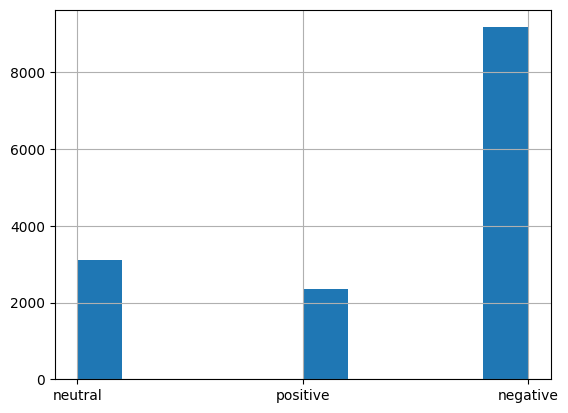

In [8]:
df["airline_sentiment"].hist()

In [9]:
target_map = {"positive": 1, "negative": 0, "neutral": 2}
df["target"] = df["airline_sentiment"].map(target_map)

In [10]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [11]:
df_train, df_test = train_test_split(df)

In [12]:
df_train.head()

,airline_sentiment,text,target
1667,negative,@united pushing five hours and my time is wort...,0
8412,positive,@JetBlue #Bluemanity @AirlineAdviser loves thi...,1
882,positive,@united I left my comment with customer care. ...,1
633,negative,"@united By the way, a simple apology goes a lo...",0
3724,negative,@united - my son left his tablet on plane. Am...,0


In [13]:
vectorizer = TfidfVectorizer(max_features = 2000)

In [14]:
X_train = vectorizer.fit_transform(df_train["text"])

In [15]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157588 stored elements in Compressed Sparse Row format>

In [16]:
X_test = vectorizer.transform(df_test["text"])

In [17]:
Y_train = df_train["target"]
Y_test = df_test["target"]

In [19]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8557377049180328
Test acc: 0.8030054644808743


In [20]:
Pr_train = model.predict_proba(X_train) # [:, 1]
Pr_test = model.predict_proba(X_test) # [:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class="ovo"))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class="ovo"))

Train AUC: 0.9432964518760709
Test AUC: 0.8914684150484705


In [21]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [23]:
cm = confusion_matrix(Y_train, P_train, normalize="true")
cm

array([[0.96222028, 0.0088637 , 0.02891601],
       [0.19174208, 0.70927602, 0.0989819 ],
       [0.29399142, 0.05364807, 0.65236052]])

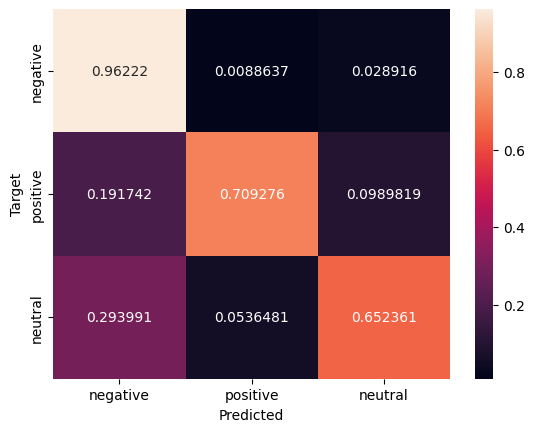

In [24]:
def plot_cm(cm):
  classes = ["negative", "positive", "neutral"]
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt="g")
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

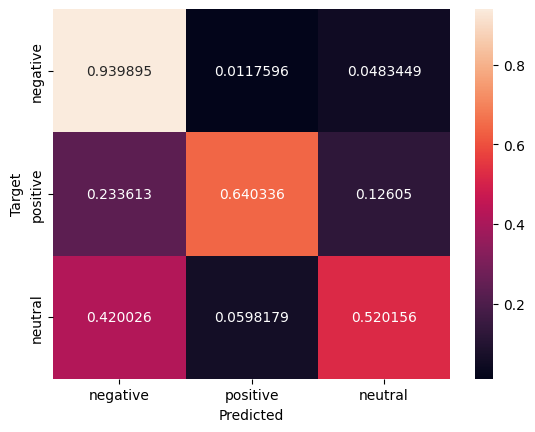

In [25]:
cm_test = confusion_matrix(Y_test, P_test, normalize="true")
plot_cm(cm_test)

# Binary Labels & Model Interpretation

In [26]:
binary_target_list = [target_map["positive"], target_map["negative"]]
df_b_train = df_train[df_train["target"].isin(binary_target_list)]
df_b_test = df_test[df_test["target"].isin(binary_target_list)]

In [27]:
df_b_train.head()

,airline_sentiment,text,target
1667,negative,@united pushing five hours and my time is wort...,0
8412,positive,@JetBlue #Bluemanity @AirlineAdviser loves thi...,1
882,positive,@united I left my comment with customer care. ...,1
633,negative,"@united By the way, a simple apology goes a lo...",0
3724,negative,@united - my son left his tablet on plane. Am...,0


In [28]:
X_train = vectorizer.fit_transform(df_b_train["text"])
X_test = vectorizer.fit_transform(df_b_test["text"])

In [29]:
Y_train = df_b_train["target"]
Y_test = df_b_test["target"]

In [30]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.9290173410404624
Test acc: 0.7796610169491526


In [31]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9785636607268486
Test AUC: 0.4284114865458379


In [32]:
model.coef_

array([[-0.28599428,  0.68409476, -0.20212711, ...,  0.00842632,
         0.16880516, -0.51777616]])

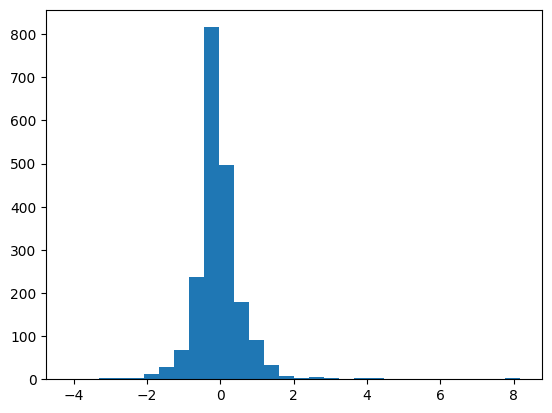

In [33]:
plt.hist(model.coef_[0], bins=30);

In [34]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'thanks': 1678,
 'hope': 809,
 'don': 482,
 'look': 1000,
 'like': 971,
 've': 1850,
 'written': 1965,
 'of': 1170,
 'good': 733,
 'experiences': 550,
 'you': 1986,
 'in': 846,
 'the': 1681,
 'past': 1255,
 'and': 123,
 'am': 115,
 'making': 1030,
 'do': 475,
 'terminal': 1670,
 'jetblue': 900,
 'united': 1815,
 'yea': 1975,
 'refund': 1393,
 'your': 1989,
 'airline': 99,
 'ruined': 1463,
 'our': 1217,
 'trip': 1764,
 'americanair': 118,
 'phone': 1283,
 'call': 264,
 'or': 1204,
 'email': 510,
 'when': 1911,
 'cancelled': 271,
 'flight': 622,
 'would': 1960,
 'be': 208,
 'lovely': 1014,
 'flt': 640,
 'to': 1723,
 'ord': 1205,
 'is': 883,
 'correct': 381,
 'per': 1271,
 'my': 1114,
 'dm': 474,
 'it': 888,
 'from': 682,
 'was': 1880,
 'charged': 302,
 'for': 656,
 'thank': 1676,
 'so': 1579,
 'much': 1110,
 'how': 820,
 'will': 1925,
 'able': 65,
 'contact': 375,
 'me': 1040,
 'that': 1679,
 'plane': 1299,
 'overnight': 1228,
 'at': 168,
 'next': 1138,
 'airport': 102,
 'roc': 1450,
 '

In [35]:
# let's look at the weights for each word
# try it with different threshold values!

threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight > threshold:
    print(word, weight)

Most positive words:
like 3.230550459416009
too 8.162276556027342
wrong 2.796054887852664
sucks 2.988325560028183
assaulted 2.5814095671279658
tonite 7.868813162906424
brand 3.944047838168866
bdl 4.0934144084618875
houston 5.227978837700228
travellers 2.5551186572558913
horrible 3.1401817675261965
worstairline 2.0980458207054165
logistics 2.6561896753910608
answers 3.921690035025101
flightst 2.646487412634198
operation 2.056739101117461
wasting 3.4339808775230227
miler 4.3258866649643775


In [36]:
print("Most negative words:")
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight < -threshold:
    print(word, weight)

Most negative words:
ord -3.6253276126114566
into -2.803833961618501
janet -2.323233110573737
check -2.891398132963713
wonderful -2.5402606875995737
oscars -4.143042308564792
drunk -2.6575576245337755
wtf -3.0140894003838574
otherwise -2.3051998364145825
miserable -2.054851661601959
chaos -2.1166345107396953
jax -3.0769183583389723
win -2.1180267517491562
